In [31]:
library(ggseqlogo)
library(ggplot2)
library(patchwork)

In [32]:
read_nptxt_matrix <- function(fname) {
    d=read.table(fname)
    colnames(d) = c("A", "C", "G", "T")
    t(d)
}

In [33]:
revcomp <- function(x) {
    x = x[rev(seq(nrow(x))), rev(seq(ncol(x)))]
    rownames(x) = c("A", "C", "G", "T")
    x
}

In [34]:
trim_and_plot <- function(m, rc=F, trim_left=0, trim_right=0, method='bits', ymin=0, ymax=2, title=NULL) {
    if (rc) {
        m = revcomp(m)                
    }

    #m = m[, trim_left:(ncol(m)-trim_right)]
    #m

    rownames(m) = c("A","C","G","T")
    
    f="helvetica_bold"
    
    p <- ggseqlogo(m, method=method, font=f, ncol=1, size=12) + 
                                    ylim(c(ymin,ymax)) +
                                    theme_void() 
    
    if (!is.null(title)) {
        p = p 
        p = p + ggtitle(title)
        p = p + theme(plot.title = element_text(hjust = 0.5, size=10))
        #p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
    }
    
    p
}

In [35]:
get_plots <- function(subcluster_base_path, input_ls, annotations, rc=F, trim_left=0, trim_right=0, first_yaxis=F) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    
    for (x in input_ls) {

        submotif = read_nptxt_matrix(sprintf(subcluster_base_path, x))

        #print(submotif)
        print(max(submotif))
        print(min(submotif))
 
        textn = annotations[annotations["key"]==sprintf("0_%d",x)][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right, method='custom',
                                         ymin=-0.001, ymax=0.05, title=textn)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]]  
                                    #annotate('text', 
                                    #         x=ncol(submotif), 
                                    #         y=max(submotif), 
                                    #         size=5,
                                    #         label=sprintf("%.2f",as.numeric(textn))
                                    #         )
        theme(plot.margin = unit(c(20,0,0,0), "pt"))
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

[1] 0.021495
[1] -0.000999


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.023552
[1] -0.001087


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.043413
[1] -0.000857


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.016605
[1] -5.2e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.018863
[1] -0.00088


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.021339
[1] -7e-04


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.015226
[1] -0.000287


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.015246
[1] -0.000934


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.01454
[1] -0.000421


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.018036
[1] -0.000215


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.014228
[1] -0.000288


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.02235
[1] -0.000309


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.017952
[1] -0.00024


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.015569
[1] -0.000461


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.013886
[1] -0.000661


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.020628
[1] -0.001184


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.016581
[1] -0.00037


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.0344
[1] -0.000974


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


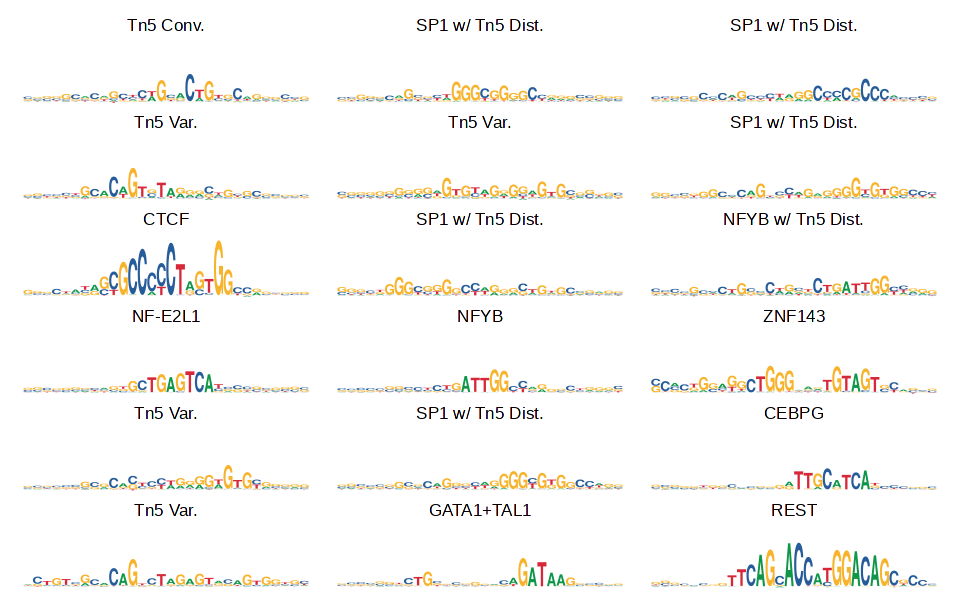

In [36]:

options(repr.plot.width = 8, repr.plot.height = 5)

atac_annotations = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/profile_annotations_chip_annotated.csv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

profile_annotations = atac_annotations
all_plots = get_plots("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/profile_0_%d.pfm", seq(0,17), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F)
#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots, ncol=3, byrow=FALSE)

ggsave("subfigs/modisco_plots/k562_profile_modisco.pdf", device = "pdf",  width = 8, height = 5, dpi = 300)

#ggsave("k562_profile_modisco.pdf", device = "pdf",  width = 18, height = 6, dpi = 300)


In [37]:
atac_counts = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/profile_counts.csv",sep=",", header=FALSE)

colnames(atac_counts) = c("key","counts")


In [38]:
new = merge(atac_annotations,atac_counts)[c("label", "counts")]

In [39]:
new_combined = aggregate(counts~.,new,FUN=sum)
new_combined["id"] = c(1)
new_combined["total"] = new_combined["counts"]*100/sum(new_combined["counts"])

new_combined = new_combined[new_combined["total"]>0.5,]
profile_annotations = new_combined

In [40]:
new_combined

,label,counts,id,total
,<chr>,<int>,<dbl>,<dbl>
2,CTCF,4514,1,21.539342
3,GATA1+TAL1,194,1,0.925705
4,NF-E2L1,845,1,4.032066
5,NFYB,285,1,1.359927
6,NFYB w/ Tn5 Dist.,114,1,0.543971
8,SP1 w/ Tn5 Dist.,1159,1,5.530372
9,Tn5 Conv.,6900,1,32.924560
10,Tn5 Var.,6713,1,32.032257


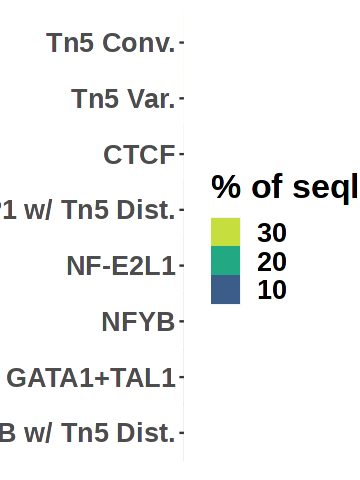

In [41]:
options(repr.plot.width = 3, repr.plot.height = 4)

p = ggplot(new_combined, aes(x=id, y=reorder(label, total)
, fill=total)) +
geom_tile() +
scale_fill_viridis_c() + 
theme(axis.ticks.x = element_blank(),
axis.text.x = element_blank(),
axis.title.y = element_blank(),
axis.title.x = element_blank(),
text = element_text(size=20, face="bold")) + guides(fill=guide_legend(title="% of seqlets", reverse=TRUE))

p

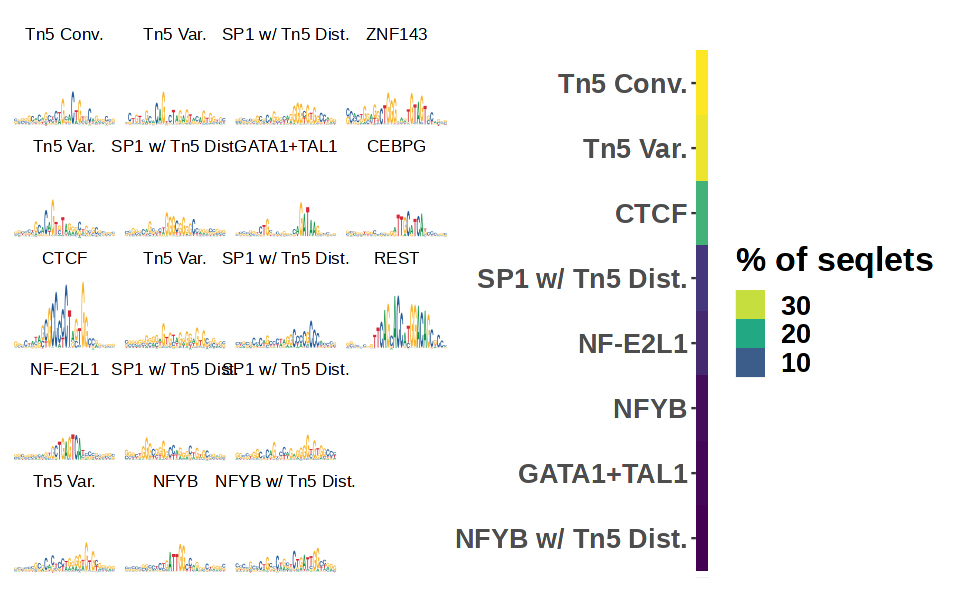

In [42]:
options(repr.plot.width = 8, repr.plot.height = 5)

wrap_plots(wrap_plots(all_plots, nrow=5, byrow=FALSE), p, widths=c(17.5,0.5))

#ggsave("subfigs/modisco_plots/k562_profile_modisco.pdf", device = "pdf",  width = 12, height = 5, dpi = 300)


[1] 0.039831
[1] -0.000503


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.017985
[1] -0.000135


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.026546
[1] -0.000283


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.027641
[1] -0.000388


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.025438
[1] -0.000102


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.024994
[1] -0.000634


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.027553
[1] -0.00039


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.017316
[1] -0.000154


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.02203
[1] -0.000242


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.013885
[1] -0.000281


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.0184
[1] -0.000307


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.019877
[1] -0.000222


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.028469
[1] -0.000326


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.022723
[1] -0.000666


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.023455
[1] -0.000677


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.013075
[1] -0.000276


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.012393
[1] -0.00028


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.021
[1] -0.000585


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.017042
[1] -0.000821


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.027123
[1] -0.000493


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.02694
[1] -0.000625


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


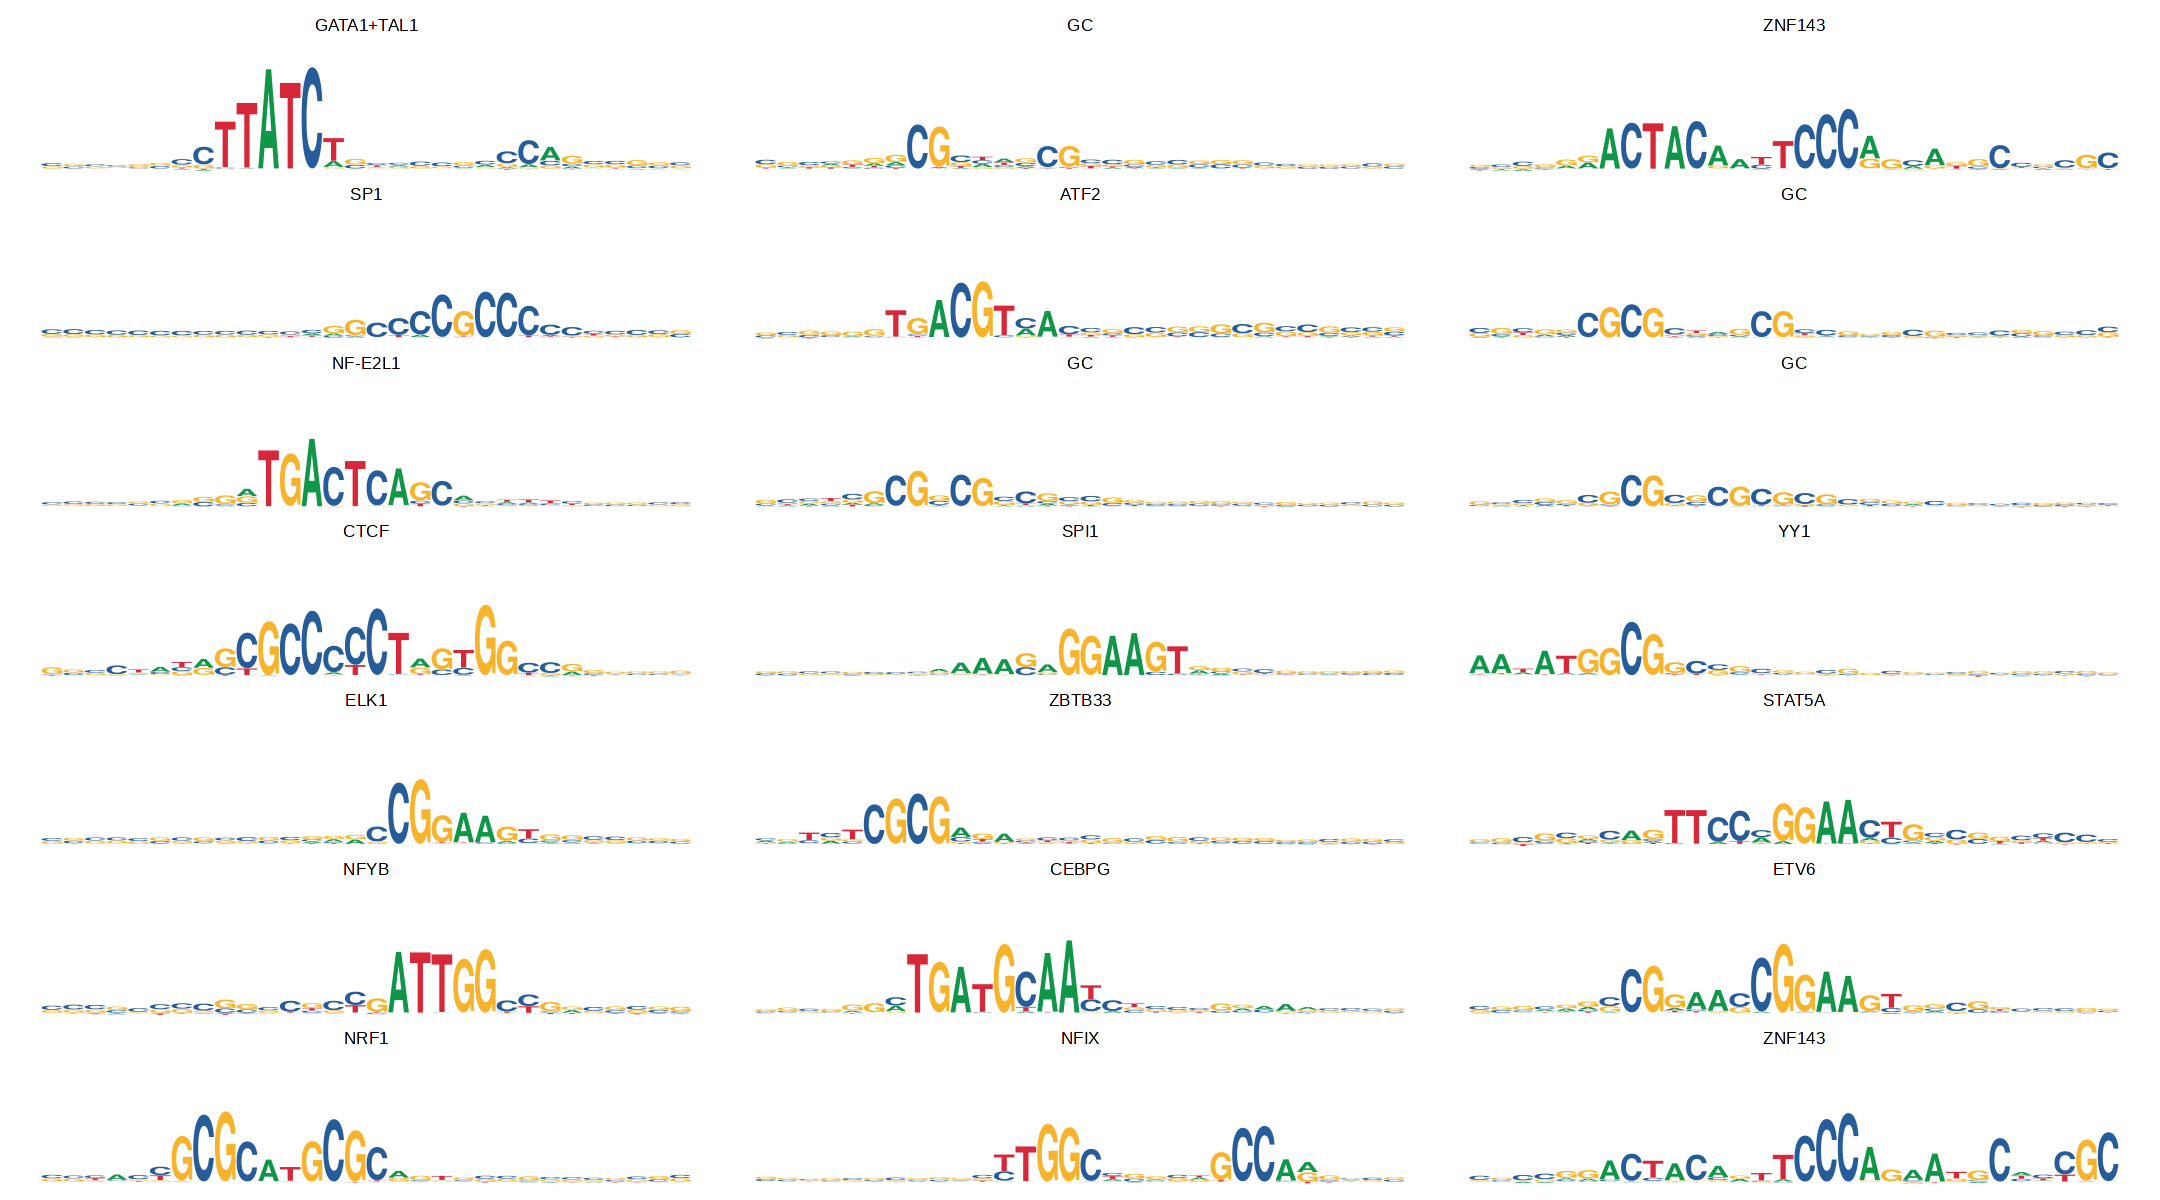

In [43]:

options(repr.plot.width = 18, repr.plot.height = 10)

atac_annotations = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/counts_annotations_chip_annotated.csv",sep=",", header=FALSE)


colnames(atac_annotations) = c("key","label")


all_plots = get_plots("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/counts_0_%d.pfm", seq(0,20), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F)
#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots, ncol=3, byrow=FALSE)

ggsave("subfigs/modisco_plots/k562_counts_modisco.pdf", device = "pdf",  width = 8, height = 5, dpi = 300)

#ggsave("k562_counts_modisco.pdf", device = "pdf",  width = 6, height = 6, dpi = 300)


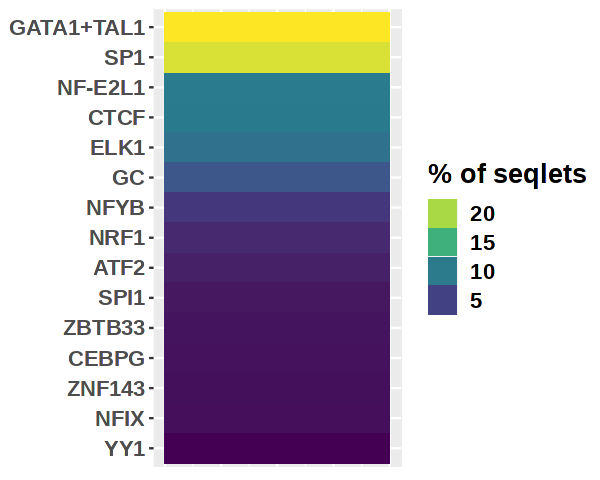

In [44]:
atac_counts = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/counts_counts.csv",sep=",", header=FALSE)

colnames(atac_counts) = c("key","counts")


new = merge(atac_annotations,atac_counts, all=FALSE)[c("label", "counts")]

new_combined = aggregate(counts~.,new,FUN=sum)
new_combined["id"] = c(1)
new_combined["total"] = new_combined["counts"]*100.0/sum(new_combined["counts"])

new_combined = new_combined[new_combined["total"]>0.5,]
count_annotations = new_combined
#print(new_combined)
options(repr.plot.width = 5, repr.plot.height = 4)

p = ggplot(new_combined, aes(x=id, y=reorder(label, total), fill=total)) +
geom_tile() +
scale_fill_viridis_c() + 
theme(axis.ticks.x = element_blank(),
axis.text.x = element_blank(),
axis.title.y = element_blank(),
axis.title.x = element_blank(),
text = element_text(size=16, face="bold")) + guides(fill=guide_legend(title="% of seqlets", reverse=TRUE))

p

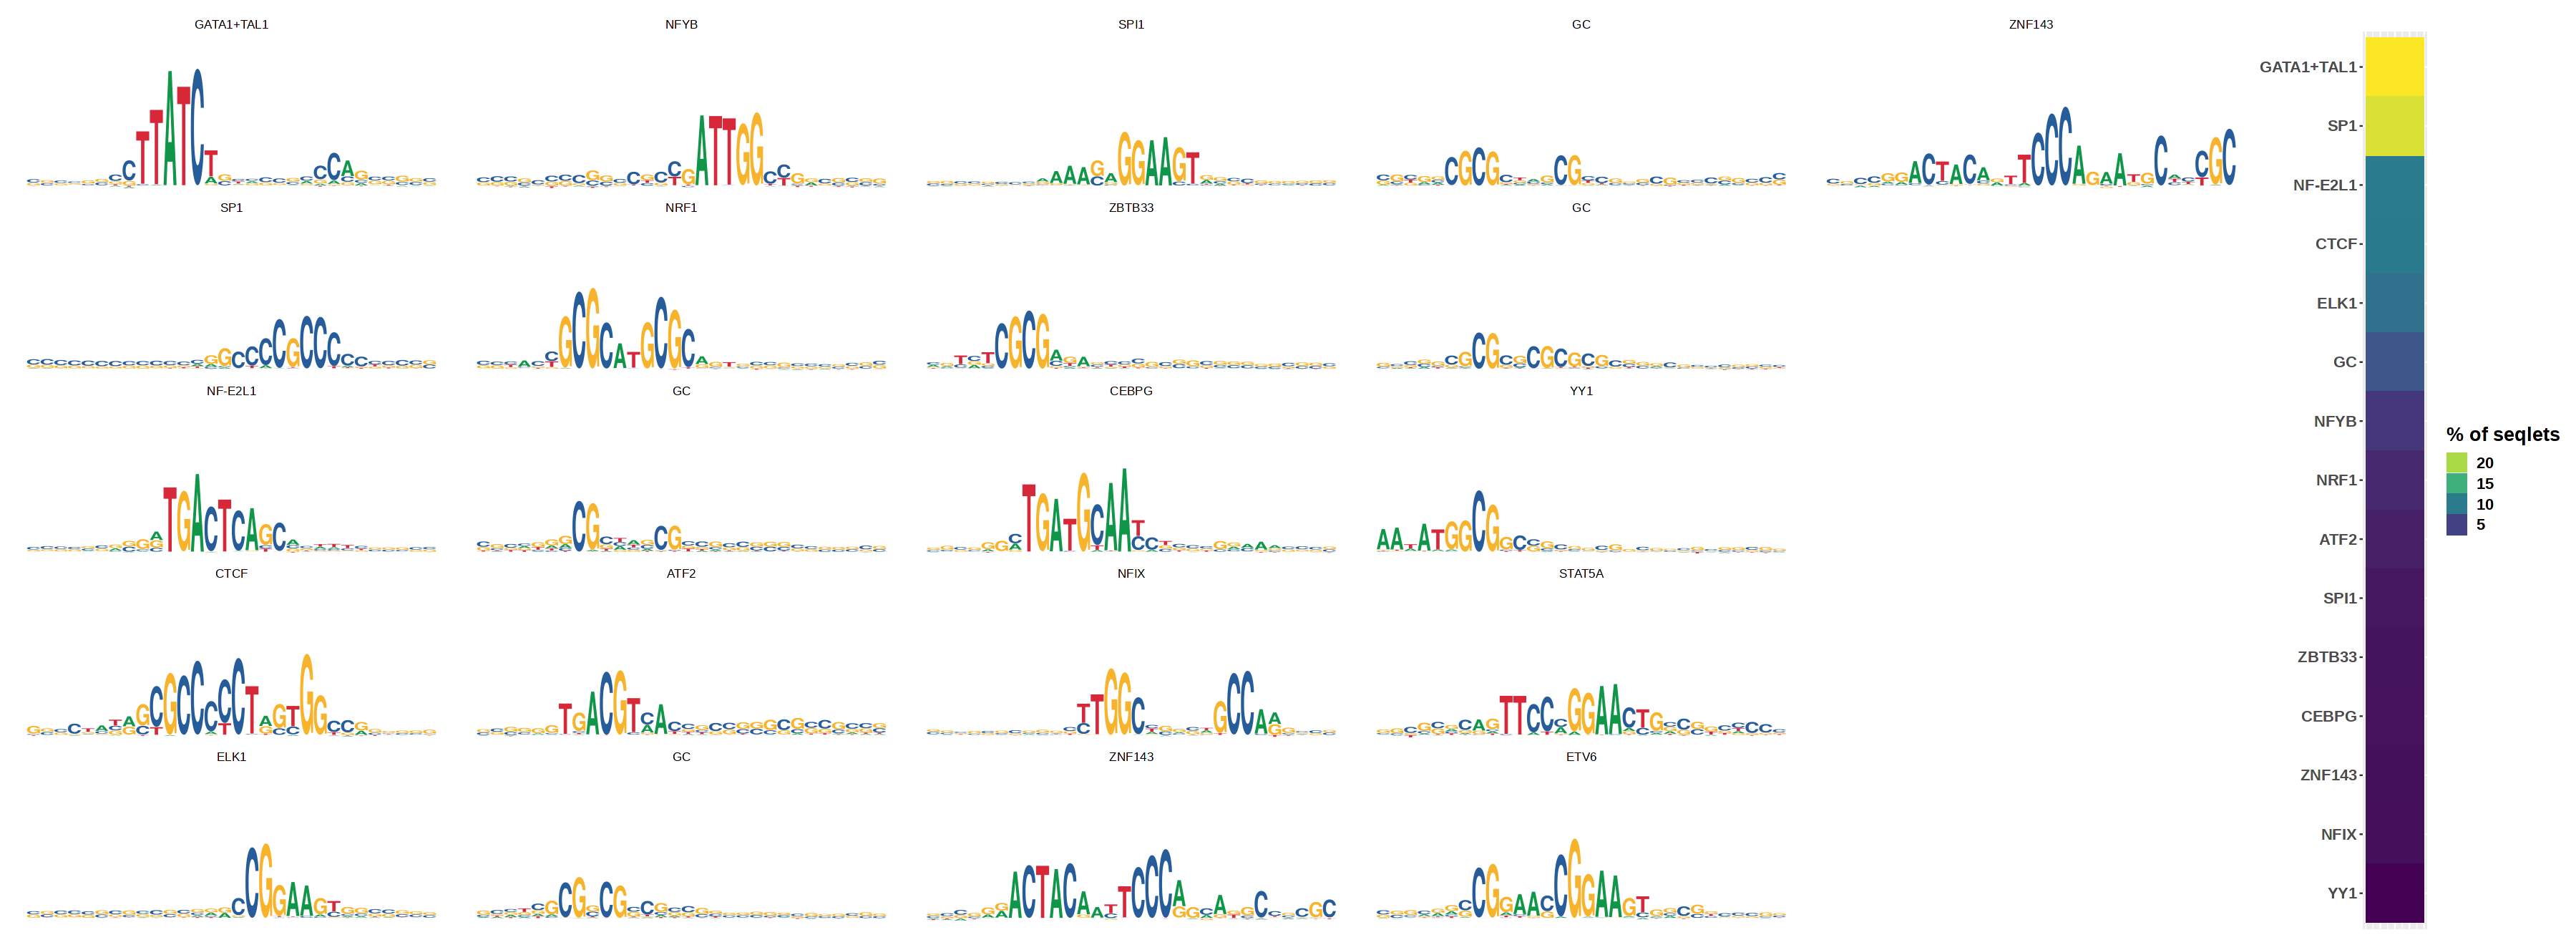

In [45]:
options(repr.plot.width = 30, repr.plot.height = 11)

wrap_plots(wrap_plots(all_plots, nrow=5, byrow=FALSE), p, widths=c(17.5,0.5))

#ggsave("subfigs/modisco_plots/k562_counts_modisco.pdf", device = "pdf",  width = 18, height = 11, dpi = 300)


In [46]:
profile_annotations[profile_annotations["label"]=="NFE2","label"] = "BACH"


In [47]:
count_annotations["source"] = "counts"

In [48]:
profile_annotations["source"] = "profile"

In [49]:
merged = rbind(count_annotations,profile_annotations)

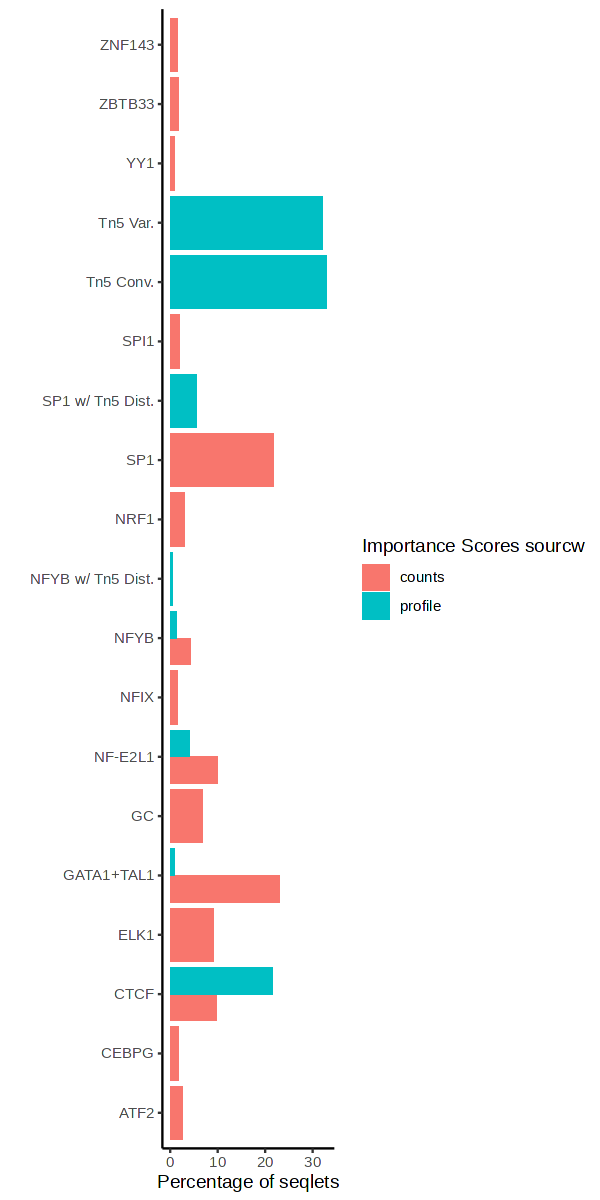

In [50]:
options(repr.plot.width = 5, repr.plot.height = 10)

ggplot(data = merged,
       mapping = aes(x = label, y = total, fill = source)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(x = "", y = "Percentage of seqlets", fill = "Importance Scores sourcw") +
  theme_classic()

In [51]:
library(ggpubr)

merged_new=merge(x = count_annotations, y = profile_annotations, by = "label", all = TRUE)
merged_new[is.na(merged_new)] <- 0 
#ggballoonplot(merged, fill = "total")

In [52]:
merged_new2 = data.frame(counts=merged_new["total.x"],profile=merged_new["total.y"])

In [53]:
colnames(merged_new2) = c("counts","profile")

In [54]:
#merged_new2$label = as.factor(merged_new2$label)

In [55]:
rownames(merged_new2) <- merged_new$label


In [56]:
merged_new2

,counts,profile
,<dbl>,<dbl>
ATF2,2.5308864,0.000000
CEBPG,1.6432770,0.000000
CTCF,9.8296749,21.539342
ELK1,9.0740074,0.000000
GATA1+TAL1,22.9758906,0.925705
GC,6.8130023,0.000000
NF-E2L1,9.9196354,4.032066
NFIX,1.4333693,0.000000
NFYB,4.1981528,1.359927


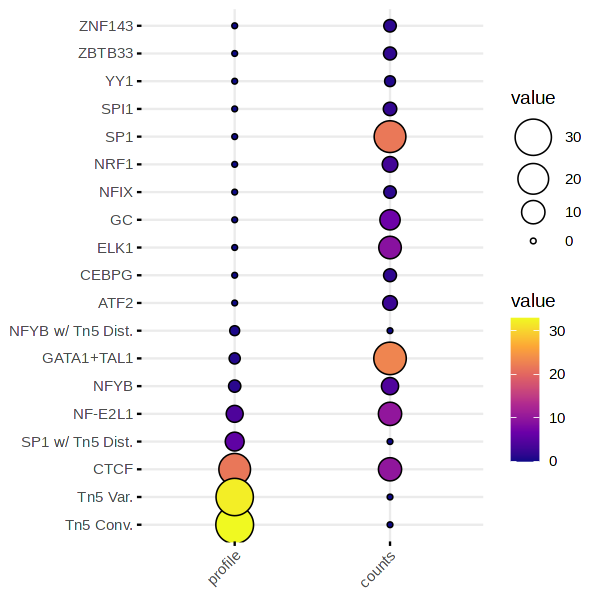

In [57]:
options(repr.plot.width = 5, repr.plot.height = 5)

MotifNames = rownames(merged_new2)[order(merged_new2$profile, decreasing=TRUE)]

ggballoonplot(merged_new2, fill = "value")+
  scale_fill_viridis_c(option = "C") + scale_y_discrete(limits = MotifNames) + scale_x_discrete(limits = c("profile", "counts"))
ggsave("subfigs/modisco_plots/atac_counts_profile_freq.pdf", device = "pdf",  width = 5, height = 5, dpi = 300)


In [28]:
merged_new2

,counts,profile
,<dbl>,<dbl>
ATF1,1.6432770,0.000000
BACH,9.9196354,4.032066
CTCF,9.8296749,21.539342
ELK,9.0740074,0.000000
FOSL2+JUN,2.5308864,0.000000
GATA+TAL,22.9758906,0.925705
GC,8.5042581,0.000000
NFIC,1.4333693,0.000000
NFYB,4.1981528,1.359927
